In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils.plot import BubbleChart

In [2]:
pth = os.path.join('..', '..')
pth_in = os.path.join(pth, 'data', 'DELAY')
# pth_out = os.path.join(pth, 'figures', 'DELAY')

In [46]:
fn = os.path.join(pth_in, 'hubsTop20.csv')
hubs = pd.read_csv(fn, index_col = 0)
hubs.index = hubs.index.str.capitalize()

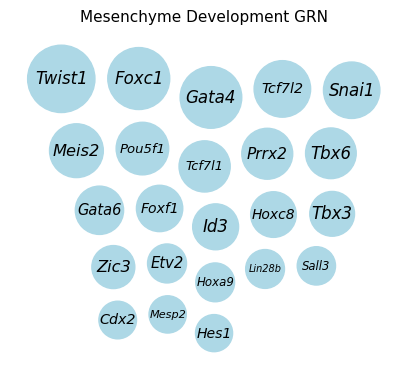

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5),
                       subplot_kw = {'aspect' : 'equal'})

bubbles = BubbleChart(hubs.Outdegree,
                      min_area = 100,
                      # random_state = ,
                      bubble_spacing = 4)

bubbles.plot(ax,
             fs_scale = 7,
             fs_min = 5,
             fs_max = 12,
             fontstyle = 'italic',
             facecolor = 'lightblue')

ax.set_title('Mesenchyme Development GRN', size = 11)

ax.invert_yaxis()

# fn = os.path.join(pth_out, 'hubs.pdf')
# plt.savefig(fn, bbox_inches = 'tight')
plt.show()

In [83]:
import numpy as np

pth_mod = os.path.join(pth, 'data', 'features', 'biomart', 'modules')

early = pd.read_csv(os.path.join(pth_mod, 'early.csv')).mmusculus
late = pd.read_csv(os.path.join(pth_mod, 'late.csv')).mmusculus

adj = pd.read_csv(os.path.join(pth_in, 'networkTop20.csv'), index_col = 0)
adj.index = adj.index.str.capitalize()
adj.columns = adj.columns.str.capitalize()

hubs[['Early', 'Late', 'Both']] = np.empty((hubs.shape[0], 3), int)
for ix in hubs.index:
    tgt_ix = adj.columns[adj.loc[ix].astype(bool)]
    both = np.isin(tgt_ix, np.intersect1d(early, late)).sum()
    hubs.loc[ix, 'Both'] = both
    hubs.loc[ix, 'Early'] = np.isin(tgt_ix, early).sum() - both
    hubs.loc[ix, 'Late'] = np.isin(tgt_ix, late).sum() - both

# hubs['Early'] = hubs.Early.div(early.size)
# hubs['Late'] = hubs.Late.div(late.size)